In [1]:
#import libraries
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt

# Bagian I Training Pada Dataset Iris dan Tennis

## 1.1 Dataset Iris

## 1.1.1 Loading Dataset

In [10]:
iris = load_iris()

In [2]:
X, y = load_iris(return_X_y=True)

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text



In [4]:
iris_df = pd.DataFrame(X)

In [5]:
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
import math
iris_df.loc[1][0] = float('nan') 

In [32]:
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,NaN,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [169]:
iris_df.corr()

,0,1,2,3
0,1.000000,-0.117570,0.871754,0.817941
1,-0.117570,1.000000,-0.428440,-0.366126
2,0.871754,-0.428440,1.000000,0.962865
3,0.817941,-0.366126,0.962865,1.000000


## 1.1.2 Training With DecisionTreeClassifier

In [33]:
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=1)
model = decision_tree.fit(X, y)
r = export_text(model, feature_names=iris['feature_names'])
print(r)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [22]:
model.decision_path(X)

<150x17 sparse matrix of type '<class 'numpy.int64'>'
	with 560 stored elements in Compressed Sparse Row format>

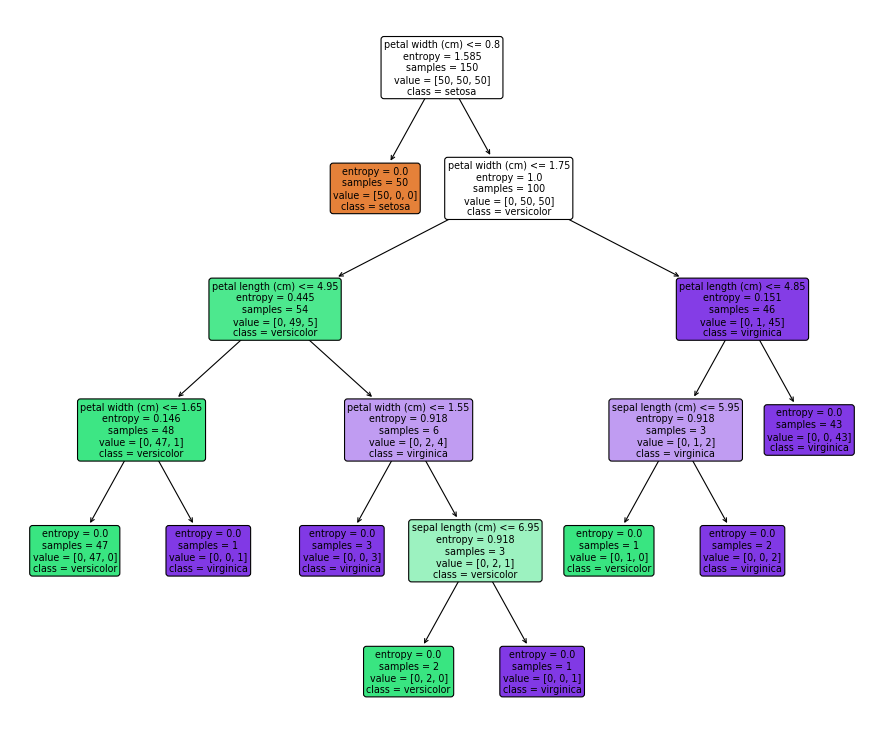

In [176]:
plt.figure(num=None, figsize=(14, 12), dpi=80, facecolor='w', edgecolor='k')
nodes = tree.plot_tree(model, filled=True, rounded=True, feature_names=iris['feature_names'], class_names=iris['target_names'])
plt.show()

## 1.1.3 Training With id3estimator

## 1.2 Dataset Tennis

In [104]:
tennis_df = pd.read_csv("play_tennis.csv")

In [105]:
tennis_df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


## 1.2.1 Preprocessing

In [177]:
X = tennis_df.drop("play", axis=1)
y= tennis_df['play'].to_numpy()

In [178]:
X.head()

,day,outlook,temp,humidity,wind
0,D1,Sunny,Hot,High,Weak
1,D2,Sunny,Hot,High,Strong
2,D3,Overcast,Hot,High,Weak
3,D4,Rain,Mild,High,Weak
4,D5,Rain,Cool,Normal,Weak


In [179]:
from sklearn.model_selection import train_test_split

In [180]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


In [181]:
X = X.apply(le.fit_transform)

In [184]:
X.to_numpy()

array([[ 0,  2,  1,  0,  1],
       [ 6,  2,  1,  0,  0],
       [ 7,  0,  1,  0,  1],
       [ 8,  1,  2,  0,  1],
       [ 9,  1,  0,  1,  1],
       [10,  1,  0,  1,  0],
       [11,  0,  0,  1,  0],
       [12,  2,  2,  0,  1],
       [13,  2,  0,  1,  1],
       [ 1,  1,  2,  1,  1],
       [ 2,  2,  2,  1,  0],
       [ 3,  0,  2,  0,  0],
       [ 4,  0,  1,  1,  1],
       [ 5,  1,  2,  0,  0]])

## 1.2.2 Training With DecisionTreeClassifier

In [187]:
model_tennis = decision_tree.fit(X, y)
_feature_names = [x for x in tennis_df.columns[:-1] ]
_target_names = [X for x in tennis_df.play.values]
r = export_text(model_tennis, feature_names=_feature_names)
print(r)

|--- outlook <= 0.50
|   |--- class: Yes
|--- outlook >  0.50
|   |--- humidity <= 0.50
|   |   |--- outlook <= 1.50
|   |   |   |--- wind <= 0.50
|   |   |   |   |--- class: No
|   |   |   |--- wind >  0.50
|   |   |   |   |--- class: Yes
|   |   |--- outlook >  1.50
|   |   |   |--- class: No
|   |--- humidity >  0.50
|   |   |--- wind <= 0.50
|   |   |   |--- temp <= 1.00
|   |   |   |   |--- class: No
|   |   |   |--- temp >  1.00
|   |   |   |   |--- class: Yes
|   |   |--- wind >  0.50
|   |   |   |--- class: Yes



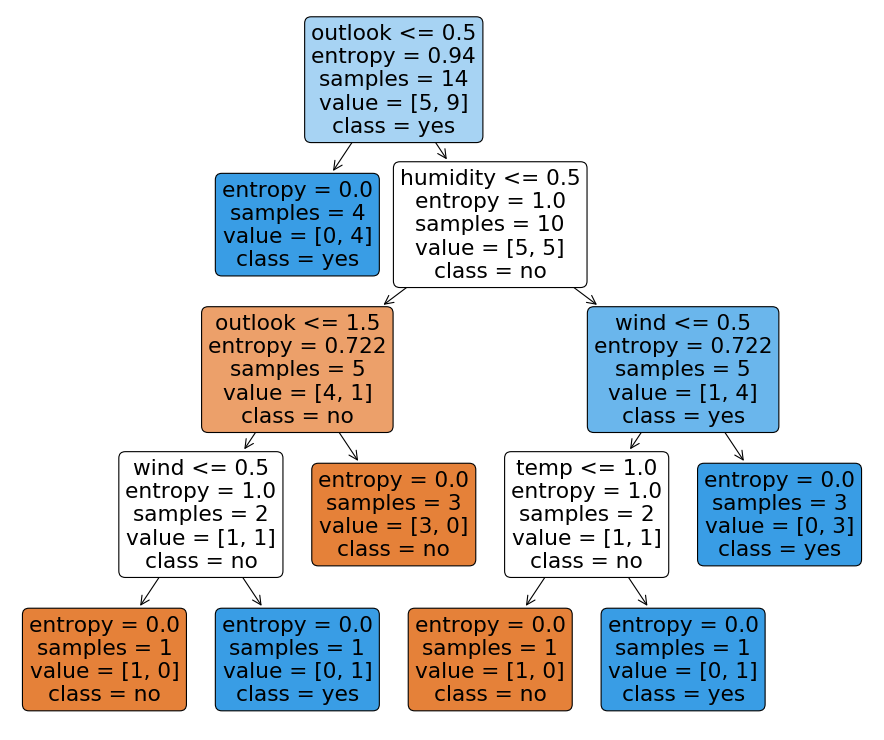

In [195]:
plt.figure(num=None, figsize=(14, 12), dpi=80, facecolor='w', edgecolor='k')
nodes = tree.plot_tree(model_tennis, filled=True, rounded=True, feature_names=_feature_names, class_names = ["no", "yes"])
plt.show()

## 1.2.3 Training with Id3Estimator

In [157]:
from id3 import Id3Estimator
from id3 import export_graphviz

In [159]:
estimator = Id3Estimator()
model_tennis_id3 = estimator.fit(X,y)
tree = export_graphviz(model_tennis_id3.tree_, 'tree.dot', _feature_names)

In [162]:
!dot -Tpdf tree.dot -o tree.pdf

# Bagian II : Analisis Perbandingan Library dengan Buku Referensi

## B.  Penanganan label dari cabang setiap nilai atribut
Setelah Classifier telah berhasil menentukan atribut terbaik, langkah selanjutnya dalah untuk menangani label yang diberi untuk setiap nilai dari atribut tersebut. Misal atribut terbaik adalah Weather, weather memiliki 3 nilai yaitu Sunny, Warm, dan Cold. Pada bagian ini akan dibahas mengenai cara algoritma menentukan label apa yang harus diberikan untuk setiap nilai atribut tersebut

### B.1 Persamaan Id3 dan DecisionTreeClassifier

Baik id3 yang dijelaskan di buku Tom Mitchell maupun DecisionTreeClassifier pada kakas Scikit melakukan penanganan label dengan cara menjalankan suatu fungsi setelah melakukan split cabang pada suatu atribut yang akan memutuskan apakah cabang tersebut akan berujung pada terminal node atau akan dilakukan proses pada poin A lagi untuk atribut yang tersisa. Cara memberi label nilai target variabel pada terminal node yang menjadi perbedaan
### B.2 Perbedaan Id3 dan DecisionTreeClassifier

Pada Id3 dalam referensi, terdapat dua kondisi untuk menentukan label dari cabang atribut suatu atribut. Pertama adalah jika seluruh atribut lainnya sudah diambil sebagai node sebelumnya maka akan dibentuk terminal node dengan label berupa nilai target variabel dengan jumlah terbanyak. Kedua, apabila hanya terdapat satu nilai target variabel yang berhubungan dengan cabang atribut tersebut, maka label akan berupa nilai variabel tersebut.

Pada library id3 dan DecisionTreeClassifier, tidak dilakukan perhitungan secara eksplisit apakah hanya terdapat satu nilai target variabel yang berhubungan namun menggunakan perhitungan entropi dan mengecek apakah entropi sudah lebih kecil dari min_entropy_decrease

## E.  Penanganan atribut dengan missing values
Salahs atu permasalahan pada proses learning adalah adanya nilai-nilai atribut yang tidak terdifinisi atau "missing". Pada bagian ini akan dilakukan analisis bagaimana kedua algoritma menangani permasalahn tersebut

### E.1 Persamaan Id3 dan DecisionTreeClassifier

Baik id3 yang dijelaskan di buku TOm Mitchell maupun DecisionTreeClassifier dan id3 berbentuk library melakukan penanganan missing values dengan melihat values lain yang terdapat pada dataset.  

### E.2 Perbedaan Id3 dan DecisionTreeClassifier

DecisionTreeClassifier dan id3 hanya dapat menerima data yang tidak memiliki missing values sehingga perlu dilakukan tahap preprocessing untuk melakukan proses imputasi. Imputasi tersebut dapat dilakukan dengn berbagai cara salah satunya dengan menggunakan library sklearn.preprocessing.SimpleImputer yang dapat melakukan imputasi berdasarkan 4 strategi yaaitu rata-rata, modus, konstan, atau median.

Pada Id3 yang dijelaskan dalam buku Tom Mitchell, terdapat dua strategi untuk menangani missing values. Pertama adalah untuk mengassign nilai missing dengan nilai yang paling umum pada node yang sekarang sedang ditinjau. Kedua adalah dengan menghitung probabilitas nilai yang mungkin untuk atribut tersebut berdasarkan nilai-nilai yang ada
